C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


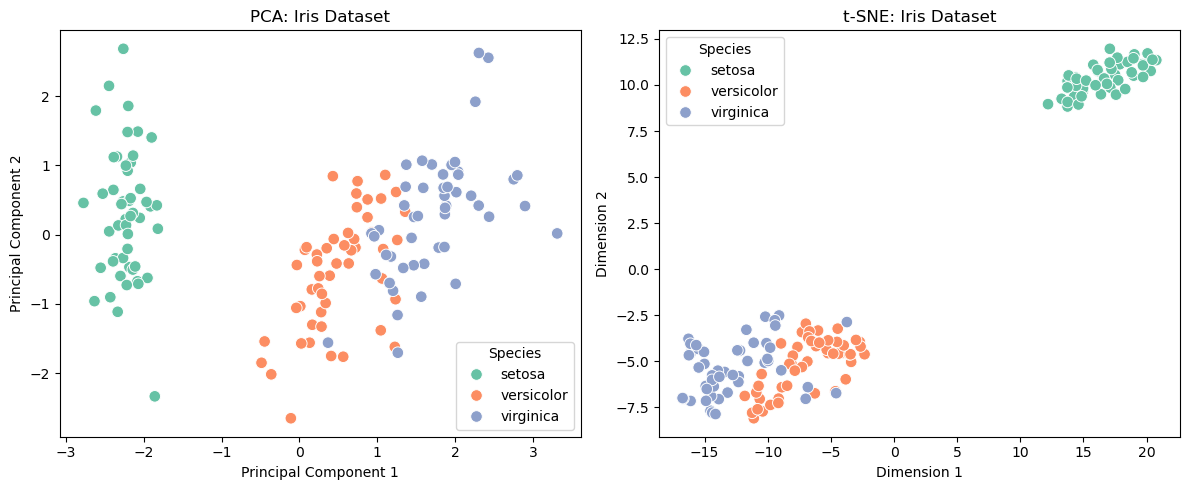

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset (Iris)
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrames for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y

df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['label'] = y

# Plot PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'].map(dict(enumerate(labels))),
                palette='Set2', s=70)
plt.title('PCA: Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')

# Plot t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue=df_tsne['label'].map(dict(enumerate(labels))),
                palette='Set2', s=70)
plt.title('t-SNE: Iris Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Species')

plt.tight_layout()
plt.show()